# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Get Datasets from Pickled Files.
import pickle

# get location of files.
import os
training_file = os.getcwd() + '\\train.p'
testing_file = os.getcwd() + '\\test.p'

# open and read pickle files.
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# get only the features and labels in datasets.
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Get a Summary of our Dataset.

# Number of training examples.
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Take a look at the first example image in training set – get shape.
image_shape = X_train[0].shape

# Get the number of unique classes/labels in dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

11


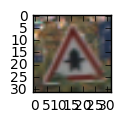

In [3]:
# Data exploration 
# Let’s take a look at a sample image

import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

# grab a random image.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

            
# print the image and the label.
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# Preprocess the data.
import cv2

from sklearn.utils import shuffle

def shuffle_data(X_train, y_train):
    X_train, y_train = shuffle(X_train, y_train)
    return X_train, y_train

# normalize pixel values of input images across all channels.
def normalize_images(X_train):
    X_train = X_train.astype('float32')
    return X_train/255. - .5


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

For preprocessing I simply normalized the pixel values that range in values [0, 255] to [-.5, .5] and shuffled the sets. I tried Histogram Equalization using OpenCV and converting to grey scale and back but this process gave slightly worse results than just simple normalisation. So I opted for the simpler approach.

In [5]:
# Split the data into training/validation/testing sets here.

# Training set has already been pulled separately: X_train, y_train.

# split test set into test/validation sets.
from sklearn.model_selection import train_test_split
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.20, random_state=42)


# Generate additional data
# By rotating or warping images in training set.

import cv2

def rotate_images(X_train, y_train, stop=1):
    for i in range(stop):
        # grab the image
        image = X_train[i]
        # get dimensions of image and calculate center
        (h, w) = image.shape[:2]
        center = (w / 2, h / 2)
        # rotate the image by either -25 or 25 degrees.
        angle = random.choice([-25, 25])
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        # add to set
        X_train = np.append(X_train, [rotated], axis=0)
        y_train = np.append(y_train, [y_train[i]], axis=0)
    return X_train, y_train

def warp_images(X_train, y_train, start=0, stop=1):
    for i in range(start, stop, 1):
        # get image
        image = X_train[i]
        # get dimensions of image
        rows,cols,ch = image.shape
        # calculate transform
        # warp randomly 1 of 2 different ways.
        chg_pts = random.choice([[[4, 8],[24, 6],[10, 30]], [[10, 10],[24, 6],[8, 28]]])
        pts1 = np.float32([[6, 6],[24, 6],[6, 24]])
        pts2 = np.float32(chg_pts)
        # perform transform and warp
        M = cv2.getAffineTransform(pts1,pts2)
        warped = cv2.warpAffine(image,M,(cols,rows))
        # add to set
        X_train = np.append(X_train, [warped], axis=0)
        y_train = np.append(y_train, [y_train[i]], axis=0)
    return X_train, y_train

# Additional images did not increase accuracy, will not add to Training set.
#X_train, y_train = rotate_images(X_train, y_train,stop=10000)
#X_train, y_train = warp_images(X_train, y_train, start=10000, stop=20000)
print(len(X_train))
        
# Check to make sure all sets have corresponding labels.
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

# shuffle training set.
X_train, y_train = shuffle_data(X_train, y_train)

# normalize training, testing and validation sets.
X_train = normalize_images(X_train)
X_test = normalize_images(X_test)
X_validation = normalize_images(X_validation)


39209


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

The training and testing sets were provided to us separately. I initially added 10,000 additional signs to the training set by either rotating the images + 25 or - 25 degrees (anymore than this I thought could potentially change the meaning of the sign). I also initially added another 10,000 signs by warping some of the signs as well, just 2 different ways (which to me, merely shifted the perspective of the signs a bit). For a total of 20,000 additonal signs. But after running the Neural Net it did not seem to matter at all, so I commented out the creation of these images. Additonally, I sliced off 20% of the testing set for validation purposes.

In [6]:
# Neural net Architecture based on LeNet.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
  
    # Arguments for tf.truncated_normal: weights & biases matrices, initialized randomly with normal distribution
    mu = 0
    sigma = 0.1
     
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x3x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Rectilinear Unit Activation.
    conv1 = tf.nn.relu(conv1)    
    # Local Response Normaliztion
    conv1 = tf.nn.local_response_normalization(conv1)
    # Max Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
    # Rectilinear Unit Activation.
    conv2 = tf.nn.relu(conv2)    
    # Local Response Normaliztion
    conv2 = tf.nn.local_response_normalization(conv2)
    # Max Pooling. Input = 10x10x64. Output = 4x4x64. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 4x4x64. Output = 1024.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1024. Output = 480.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Rectilinear Unit Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 480. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(480, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b    
    # Rectilinear Unit Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 168. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


My final Neural Net architecure consists of 2 convolutional layers and 3 fully connected layers - and this was based upon the LeNet architecture as preseneted in class. I tested an additional layer but it did not seem to yield greater accuracy through 10 epochs. In additon I made some changes to this architecture, using what seemed to be a highly influential paper - ImageNet Classification with Deep Convolutional Neural Networks by Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. The changes I made were as follows: I added Local Response Normalization in each of the convolutional layers. I also per their recommendation used a larger ksize= 3 than stride size= 2 in the max pooling. Testing both of these features did increase the accuracy on average through 10 epochs than without. I started with 32 feature maps and I used a dropout of .5 on the first 2 fully connected layers.

In [7]:
# Training Model
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# keep probablity for drop out.
keep_prob = tf.placeholder(tf.float32)

# normally just use one_hot_y = tf.one_hot(y, 43), but known issue with tensor flow for windows

with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

#num_labels = 43
#sparse_labels = tf.reshape(y, [-1, 1])
#derived_size = tf.shape(sparse_labels)[0]
#indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
#concated = tf.concat(1, [indices, sparse_labels])
#outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
#one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

# tried slower rate change (.0005) since I noticed higher and then lower accuracey values on 
# training epochs as if rate was over shooting minimum, but .001 yielded better results.

rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.740

EPOCH 2 ...
Validation Accuracy = 0.912

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.950

EPOCH 5 ...
Validation Accuracy = 0.962

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.960

EPOCH 9 ...
Validation Accuracy = 0.970

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.975

EPOCH 13 ...
Validation Accuracy = 0.969

EPOCH 14 ...
Validation Accuracy = 0.972

EPOCH 15 ...
Validation Accuracy = 0.973

EPOCH 16 ...
Validation Accuracy = 0.964

EPOCH 17 ...
Validation Accuracy = 0.964

EPOCH 18 ...
Validation Accuracy = 0.973

EPOCH 19 ...
Validation Accuracy = 0.968

EPOCH 20 ...
Validation Accuracy = 0.970

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.972

EPOCH 23 ...
Validation Accuracy = 0.971

EPOCH 24 ...
Validation Accura

Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

I used the Adamoptimizer with batch sizes of 128 and 100 epochs. I used a learning rate of .0005 and I tried a slower learning rate of .0001 but this did not seem to work any better over 20 epochs. Additionaly, I initialized the training weights on a truncated normal distribution with mu of 0 and a sigma .1. The biases were initialized to 0. 


In [8]:
#Test data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.976


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

My general approach in coming up with this solution was to use the basic LeNet architecture that was provided in class plus I read up on several optimization tips presented in papers, specifically the paper mentioned earlier. And then it was just trial and error from there. Keeping aspects that seemed to increase the accuracy and discarding aspects that did not. Specifically, I first changed the number of feature maps created from the LeNet Architecure 6 to 18. This increased the accuracy and from there I tried increasing the number of convolutional layers from 2 to 3. But this did not yield better results through 10 epochs so I reversed tack and reduced the number of convolutional layers back down to 2 and next increased the number of feature maps from 18 to 32. This increased the accuracy so I next added the local response normalization which seemed to have a positive effect as well. Next I changed the max pooling ksize from 2 to 3 and left the Max Pooling Stride at 2, which as described in the paper mentioned above did have a positive effect. Finally I added the dropout of .5 to the training set and once again, this yielded good results. My main rational was to use the LeNet architecture as provided in class, since it was a designed to be used for image recogniton and then use internet searches to find ways to optimize this architecture for my current problem. I read a few papers and websites, but the one I based most of my changes on was the one that seemed to be highest ranked of the papers in my search. I did not use the same architecture as the paper cited since my training set was much smaller and the number of features was far less and I did not have as much time to train as they did in their paper. Plus as I already mentioned additional convolutional layers did not seem to give better results. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)


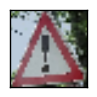

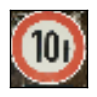

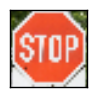

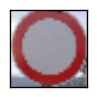

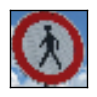

In [9]:
# Load the images and plot them here.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

# images from Internet cropped and reduced in size
img = cv2.imread('Zeichen_201+1006-39.jpeg')
b,g,r = cv2.split(img)       # get b,g,r
img = cv2.merge([r,g,b])     # switch it to rgb
rsi1 = cv2.resize(img, (32,32))

img2 = cv2.imread('Verkehrszeichen_2924.jpg')
b,g,r = cv2.split(img2)       # get b,g,r
img2 = cv2.merge([r,g,b])     # switch it to rgb
rsi2 = cv2.resize(img2, (32,32))

img3 = cv2.imread('Verkehrsschilder_3601.jpg')
b,g,r = cv2.split(img3)       # get b,g,r
img3 = cv2.merge([r,g,b])     # switch it to rgb
rsi3 = cv2.resize(img3, (32,32))

img4 = cv2.imread('Solingen_Burg_-_Seilbahn_30_ies.jpg')
b,g,r = cv2.split(img4)       # get b,g,r
img4 = cv2.merge([r,g,b])     # switch it to rgb
rsi4 = cv2.resize(img4, (32,32))

img5 = cv2.imread('Sichertshausen_Lahn-Hochwasser_Lahntalradweg_(Germany)_2015-12-06_(2).jpg')
b,g,r = cv2.split(img5)       # get b,g,r
img5 = cv2.merge([r,g,b])     # switch it to rgb
rsi5 = cv2.resize(img5, (32,32))

img6 = cv2.imread('Dienstweg.jpg')
b,g,r = cv2.split(img6)       # get b,g,r
img6 = cv2.merge([r,g,b])     # switch it to rgb
rsi6 = cv2.resize(img6, (32,32))

images = [rsi1, rsi2, rsi4, rsi5, rsi6]


for i in images:
    plt.figure(figsize=(3,1))
    plt.imshow(i)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show
    
imgs = np.array(images)
imgs = normalize_images(imgs)
print(imgs.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



The images I chose from a google search on the internet were cropped versions of larger pictures. Unfortunately, for some reason after I cropped them, all the pictures showed up as blue, black and white. No red. This could make a difference in my classifier since it was trained on correctly colored images.

In [13]:
# Run the predictions here.

# Use 5 candidate images - New Images.


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder('float32')


logits = LeNet(x)
predict = tf.argmax(logits, 1)



with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(predict, feed_dict={x: imgs, keep_prob: 1.0})
    print(predictions)
    
    

FailedPreconditionError: Attempting to use uninitialized value Variable_45
	 [[Node: Variable_45/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_45"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_45)]]
	 [[Node: ArgMax_6/_69 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_60_ArgMax_6", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Variable_45/read', defined at:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-e930668a6a12>", line 11, in <module>
    logits = LeNet(x)
  File "<ipython-input-6-9f0903d06de6>", line 38, in LeNet
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 480), mean = mu, stddev = sigma))
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_45
	 [[Node: Variable_45/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_45"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_45)]]
	 [[Node: ArgMax_6/_69 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_60_ArgMax_6", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


My saved model does not perform well.

In [ ]:
# Visualize the softmax probabilities here.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.